In [8]:
import pandas as pd
import numpy as np

RANDOM_STATE = 42

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

import matplotlib.pyplot as plt

In [9]:
file = 'S05-hw-dataset.csv'
data = pd.read_csv(file, sep = ',')

In [10]:
data.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [12]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [13]:
count_dupblicated = data.duplicated().sum()
count_dupblicated

np.int64(0)

In [14]:
data['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

## Наблюдения:
- в датасете: `3000` объектов и `15` признаков (без учета client_id и default),
- явных аномалий не обнаружено,
- баланс классов (default): 0 - `0.59%`, 1 - `0,41%`



In [31]:
#X = data.iloc[:, 1:16]
X = data.drop(columns=['client_id', 'default'])
y = data['default']

In [32]:
X

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2
2996,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12
2997,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10
2998,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8


In [33]:
y

0       0
1       0
2       0
3       1
4       1
       ..
2995    0
2996    0
2997    1
2998    1
2999    0
Name: default, Length: 3000, dtype: int64

In [18]:
X.shape

(3000, 15)

In [19]:
y.shape

(3000,)

In [20]:
X.dtypes

age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object

In [21]:
y.dtypes

dtype('int64')

In [22]:
for val in X['debt_to_income']:
    if not(val <= 1 and val >= 0):
        print("debt_to_income не принадлежит промежутку [0, 1]")

In [23]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    stratify=y,
    random_state=RANDOM_STATE,
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [24]:
baseline = DummyClassifier(strategy="stratified", random_state=RANDOM_STATE)

baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)
     

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.5133333333333333
Precision: 0.4108527131782946
Recall   : 0.43089430894308944
F1-score : 0.42063492063492064
ROC-AUC  : 0.5007578889348215


Классификатор DummyClassifier генерирует предсказания на основе распределения классов в обучающем наборе. Наша модель, которую мы будем обучать, должна быть не хуже DummyClassifier и её значений метрик.

In [25]:
C_arr = [0.01, 0.1, 1.0, 10.0, 100.0]
for C in C_arr:
    log_reg_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("logreg", LogisticRegression(
                    max_iter=1000,
                    C=C,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                    solver="liblinear", # надёжный солвер для маленьких датасетов
                    random_state=RANDOM_STATE,
                ),
            ),
    ])
    
    log_reg_pipeline.fit(X_train, y_train)
    
    y_val_pred = log_reg_pipeline.predict(X_val)
    y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]
    
    print(f"=== Логистическая регрессия (C={C}) – качество на validation ===")
    print("Accuracy :", accuracy_score(y_val, y_val_pred))
    print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
    print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
    print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

    y_test_pred = log_reg_pipeline.predict(X_test)
    y_test_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]
    
    print(f"--- Логистическая регрессия (C={C}) – качество на test ---")
    print("Accuracy :", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
    print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
    print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))
    print("_______________________________________________________________\n\n")


=== Логистическая регрессия (C=0.01) – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8750631574112351
--- Логистическая регрессия (C=0.01) – качество на test ---
Accuracy : 0.805
Precision: 0.8086124401913876
Recall   : 0.6869918699186992
F1-score : 0.7428571428571429
ROC-AUC  : 0.8746153139497497
_______________________________________________________________


=== Логистическая регрессия (C=0.1) – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244
--- Логистическая регрессия (C=0.1) – качество на test ---
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231
_______________________________________________________________


=== Логистическая регрессия (C=1.0) – качество на validation ===
Accur

In [26]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)


Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.853594897701044


In [27]:
best_model = grid_search.best_estimator_

y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]
print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))


y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

=== Лучшая модель – качество на validation ===
Accuracy : 0.815
Precision: 0.8534031413612565
Recall   : 0.6626016260162602
F1-score : 0.7459954233409611
ROC-AUC  : 0.8746267971154288

=== Лучшая модель – качество на test ===
Accuracy : 0.8033333333333333
Precision: 0.8047619047619048
Recall   : 0.6869918699186992
F1-score : 0.7412280701754386
ROC-AUC  : 0.8748794267603692


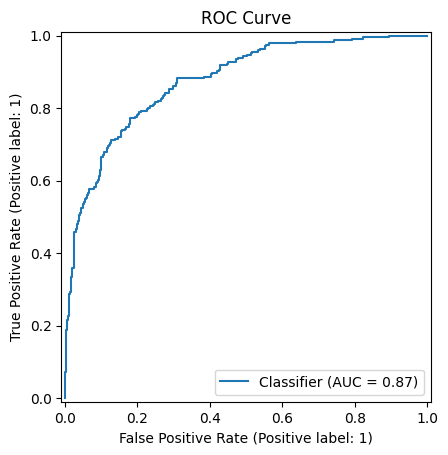

In [28]:
fig_roc, ax_roc = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_test_proba, ax=ax_roc)
ax_roc.set_title("ROC Curve")
fig_roc.savefig("figures/roc_curve.png", dpi=300)

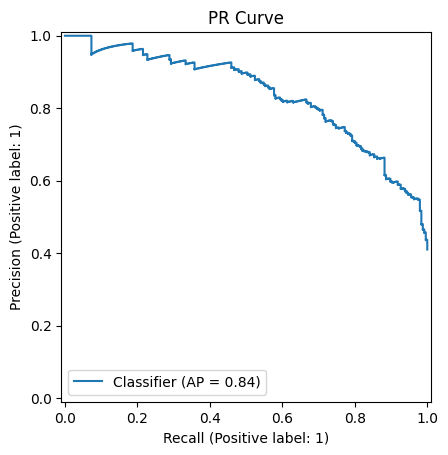

In [29]:
fig_pr, ax_pr = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_test_proba, ax=ax_pr)
ax_pr.set_title("PR Curve")
fig_pr.savefig("figures/pr_curve.png", dpi=300)


In [30]:
df = pd.DataFrame([
    [accuracy_score(y_test, y_test_pred),
     precision_score(y_test, y_test_pred, zero_division=0),
     recall_score(y_test, y_test_pred, zero_division=0),
     f1_score(y_test, y_test_pred, zero_division=0),
     roc_auc_score(y_test, y_test_proba)],
    [accuracy_score(y_val, y_val_pred_baseline),
     precision_score(y_val, y_val_pred_baseline, zero_division=0),
     recall_score(y_val, y_val_pred_baseline, zero_division=0),
     f1_score(y_val, y_val_pred_baseline, zero_division=0),
     roc_auc_score(y_val, y_val_proba_baseline)]],
     columns=["accuracy", "precision", "recall", "f1", "roc_auc"],
     index=["LogisticRegression", "DummyClassifier"]
)   
df

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.803333,0.804762,0.686992,0.741228,0.874879
DummyClassifier,0.513333,0.410853,0.430894,0.420635,0.500758


## Краткий текстовый отчёт:
- Baseline задаёт нам границу снизу по качеству модели (наша модель, которую мы будем обучать, не должна быть хуже нашего baseline, иначе модель ужасная),
- В задачах с возможным дисбалансом классов нельзя смотреть только на accuracy, важно учитывать хотя бы F1 и ROC-AUC
- Относительно baseline наша модель увеличила метрики на:
    - accuracy `0.29`,
    - precision `0.39`,
    - recall `0.256`,
    - f1 `0.32`,
    - roc_auc `0.37`
- Чем меньше C, тем сильнее регуляризация.
- Чем больше C, тем модель свободнее
- Лог. регрессия - разумный выбор, так как признаки в основном числовые, и, вероятно, линейно связаны с риском дефолта.


DummyClassifier — базовый (наивный) классификатор
Не учится на данных в смысле выявления закономерностей.
Делает предсказания наивно, по простому правилу:
'stratified' (по умолчанию): предсказывает случайно, сохраняя распределение классов из обучающей выборки.
'most_frequent': всегда предсказывает самый частый класс.
'constant': всегда предсказывает заданный класс.
Зачем? Чтобы иметь базовую линию (baseline).
Если модель работает хуже DummyClassifier, значит, она бесполезна.

LogisticRegression — реальный обучающийся классификатор
Строит линейную модель для оценки вероятности принадлежности к классу.
Находит оптимальные веса признаков, минимизируя функцию потерь.
Учитывает реальные зависимости между признаками и целевой переменной.
Используется для настоящих предсказаний.